In [5]:
import numpy as np
import engine as e
import torch

In [6]:
class Tensor:
    """ represents matrix as a collection of node in computation graph """

    def __init__(self, data:[list|np.ndarray], dtype='float32', requires_grad=True):
        self.data = data if isinstance(data, np.ndarray) else np.array(data, dtype=dtype) 
        self.grad = None
        self.requires_grad = requires_grad
        if self.requires_grad:
            self.grad = Tensor(np.zeros_like(self.data), requires_grad=False)
        self.backward = lambda: None
        self.shape = self.data.shape

    def __repr__(self):
        return str(self.data.__repr__())
    
    def __type__(self):
        return Tensor
    
    def __add__(self, other:list):
        other = other if isinstance(other, Tensor) else Tensor(other)
        out = Tensor(self.data + other.data)

        def _backward(gradient=None):
            gradient = out.grad if gradient is None else gradient
            self.grad += gradient
            other.grad += gradient
        
        out.backward = _backward

        return out
    
    def __radd__(self, other:list):
        return self.__add__(other)
    
    def __mul__(self, other:list):
        other = other if isinstance(other, Tensor) else Tensor(other)
        out = Tensor(self.data * other.data)

        def _backward(gradient=None):
            gradient = out.grad if gradient is None else gradient
            self.grad += other * gradient
            other.grad += self * gradient
        
        out.backward = _backward

        return out
    
    def __rmul__(self, other:list):
        return self.__mul__(other)
    
    def transpose(self):
        out = Tensor(self.data.T)

        def _backward(gradient=None):
            gradient = out.grad if gradient is None else gradient
            self.grad += gradient.T
        
        out.backward = _backward

        return out

    @property
    def T(self):
        return self.transpose()

    def __matmul__(self, other:list):
        other = other if isinstance(other, Tensor) else Tensor(other)
        out = Tensor(np.matmul(self.data,other.data))

        def _backward(gradient=None):
            gradient = out.grad if gradient is None else gradient
            self.grad += gradient @ other.T
            other.grad += self.T @ gradient
        
        out.backward = _backward

        return out
    def __rmatmul__(self, other:list):
        return self.__matmul__(other)


In [7]:
def matmul(a:Tensor, b:Tensor):
    return Tensor(np.matmul(a.data , b.data))

In [8]:
type(Tensor([1, 2, 3]))

__main__.Tensor

ADD

In [9]:
a = Tensor([1, 2, 3])
b = Tensor([4, 5, 6])
c=a+b
c.grad = Tensor([11, 11, 11])
c.backward()

In [10]:
a.grad, b.grad, c.grad

(array([11., 11., 11.], dtype=float32),
 array([11., 11., 11.], dtype=float32),
 array([11., 11., 11.], dtype=float32))

In [11]:
a = torch.tensor([1., 2., 3.], requires_grad=True)
b = torch.tensor([4., 5., 6.], requires_grad=True)
c=a+b
c.backward(torch.tensor([11., 11., 11.]))

In [12]:
a.grad, b.grad, c.grad

C:\Users\Abhijith\AppData\Local\Temp\ipykernel_928\1831097205.py:1: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at C:\cb\pytorch_1000000000000\work\build\aten\src\ATen/core/TensorBody.h:494.)
  a.grad, b.grad, c.grad


(tensor([11., 11., 11.]), tensor([11., 11., 11.]), None)

In [13]:
a = e.Tensor([1, 2, 3])
b = e.Tensor([4, 5, 6])
c=a+b
c.grad = e.Tensor([11, 11, 11])
c.backward()

In [14]:
a.grad, b.grad, c.grad

(Tensor([0., 0., 0.], dtype=float32, dtype=float32, grad=False),
 Tensor([0., 0., 0.], dtype=float32, dtype=float32, grad=False),
 Tensor([11., 11., 11.], dtype=float32, dtype=float32, grad=True))

In [15]:
a = e.random.randn(3, 3)
b = e.random.randn(3, 3)
t = a + b
t.backward(e.random.randn(3, 3))

In [16]:
e.allclose(a.grad, b.grad), t.grad

(True,
 Tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], dtype=float64, grad=False))

radd

In [17]:
Tensor(np.random.randn(3, 3)) + Tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

array([[1.20598842, 1.69176454, 3.35664552],
       [4.25029667, 6.11504881, 5.851041  ],
       [6.79097039, 8.34462704, 9.0184353 ]])

In [18]:
type(Tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]]) + np.random.randn(3, 3))

__main__.Tensor

Multiplication

In [19]:
a = Tensor([1, 2, 3])
b = Tensor([4, 5, 6])
c=a*b
c.grad = Tensor([11, 11, 11])
c.backward()
a.grad, b.grad, c.grad, c

(array([44., 55., 66.], dtype=float32),
 array([11., 22., 33.], dtype=float32),
 array([11., 11., 11.], dtype=float32),
 array([ 4., 10., 18.], dtype=float32))

In [20]:
a = e.random.randn(3, 3)
b = e.random.randn(3, 3)
t = a * b
t.backward(e.random.randn(3, 3))
a.grad, b.grad, t

(Tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], dtype=float64, grad=False),
 Tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], dtype=float64, grad=False),
 Tensor([[-0.63474641,  1.19208626, -0.2277817 ],
        [-0.0032907 ,  0.33141239,  0.14076812],
        [ 0.24001272, -0.36068403,  0.36389535]], dtype=float64, grad=True))

In [21]:
Tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]]) * [[1, 2, 3], [4, 5, 6], [7, 8, 9]]

array([[ 1.,  4.,  9.],
       [16., 25., 36.],
       [49., 64., 81.]], dtype=float32)

In [22]:
[[1, 2, 3], [4, 5, 6], [7, 8, 9]] * Tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

array([[ 1.,  4.,  9.],
       [16., 25., 36.],
       [49., 64., 81.]], dtype=float32)

Matrix Multiplication

In [23]:
a = torch.randn(3, 4, requires_grad=True)
b = torch.randn(4, 3, requires_grad=True)
t = a @ b
t.backward(torch.ones_like(t))
a.grad, b.grad, t

(tensor([[ 1.1138, -0.3982, -2.2144, -0.3829],
         [ 1.1138, -0.3982, -2.2144, -0.3829],
         [ 1.1138, -0.3982, -2.2144, -0.3829]]),
 tensor([[2.1001, 2.1001, 2.1001],
         [0.8526, 0.8526, 0.8526],
         [0.0195, 0.0195, 0.0195],
         [0.0443, 0.0443, 0.0443]]),
 tensor([[ 0.7394,  2.3097, -0.2895],
         [-0.5216, -0.5221,  0.1430],
         [ 0.0209, -0.0238,  0.0834]], grad_fn=<MmBackward0>))

In [24]:
a = e.Tensor(a.detach().numpy())
b = e.Tensor(b.detach().numpy())
t = a@b
t.backward(e.Tensor(np.ones_like(t.data)))
a.grad, b.grad, t

(Tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]], dtype=float32, dtype=float32, grad=False),
 Tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], dtype=float32, dtype=float32, grad=False),
 Tensor([[ 0.7393746 ,  2.3097136 , -0.2895497 ],
        [-0.5215671 , -0.5220621 ,  0.14297289],
        [ 0.02085754, -0.02377351,  0.0833724 ]], dtype=float32, dtype=float32, grad=True))

In [25]:
d = .0001
(((a + d)@b)-((a)@b))/d

Tensor([[-0.27298927, -1.7166138 ,  0.10728836],
       [-0.27298927, -1.7154217 ,  0.10684133],
       [-0.27298927, -1.7152727 ,  0.10684133]], dtype=float32, dtype=float32, grad=True)

Linear Layer

In [1170]:
class Linear():

    def __init__(self, in_features, out_features, requires_grad=True, bias=True):
        self.in_features = in_features
        self.out_features = out_features
        # avoid broadcasting while backpropagating
        self.weight = 0.001 * e.random.randn(out_features, in_features)
        self.requires_grad = requires_grad
        self.bias = None
        if bias:
            self.bias = .001 *e.random.randn(out_features)

    def __call__(self, x):
        return self.linear(x, self.weight, self.bias)

    def linear(self, x: e.Tensor, w: e.Tensor, b: e.Tensor=None):
        assert x.shape[-1] == w.shape[-1]
        assert isinstance(x, e.Tensor)
        if b is not None:
            return x @ w.T + b
        return x @ w.T

In [7]:
lin = Linear(3, 4)
x = e.Tensor([1, 2, 3])
o = lin(x)
o.grad = e.ones_like(o)
o.backward()
o, lin.weight, lin.bias, lin.weight.grad, lin.bias.grad, o.grad

(Tensor([-0.00087114,  0.00183526,  0.00046648, -0.00133212], dtype=float64, grad=True),
 Tensor([[-1.13569669e-03, -2.72371123e-04,  5.61251992e-04],
        [-1.02650835e-03,  5.84534084e-04,  4.54741598e-04],
        [ 8.20918918e-05,  5.18949790e-04, -2.16269586e-04],
        [-4.20539479e-04,  6.05782918e-04, -8.54204913e-04]], dtype=float64, grad=True),
 Tensor([-8.74456916e-04,  3.28471878e-04, -4.70571559e-06,  4.39467076e-04], dtype=float64, grad=True),
 Tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], dtype=float64, grad=False),
 Tensor([0., 0., 0., 0.], dtype=float64, grad=False),
 Tensor([1., 1., 1., 1.], dtype=float64, grad=True))

In [8]:
lin(x)._children

{Tensor([ 3.31703858e-06,  1.50678461e-03,  4.71182712e-04, -1.77158838e-03], dtype=float64, grad=True),
 Tensor([-8.74456916e-04,  3.28471878e-04, -4.70571559e-06,  4.39467076e-04], dtype=float64, grad=True)}

cross entropy loss

In [22]:
def cross_entropy(pred, tar):
    softmax = e.exp(pred)
    if len(pred.shape) > 1:
        softmax /= e.sum(softmax, axis=1, keepdims=True)
    else:
        softmax /= e.sum(softmax)
    return -e.mean(e.sum(tar * e.log(softmax), 1))

In [10]:
tar = e.zeros((4, 3))
tar_index = e.Tensor([1, 2, 0, 1])

In [11]:
torch_pred = torch.tensor([[1, 2, 3], [1, 2, 3], [1, 2, 3], [1, 2, 3]], dtype=torch.float32)
torch_y = torch.tensor([1, 2, 0, 1])
torch.nn.functional.cross_entropy(torch_pred, torch_y), torch_y.shape

(tensor(1.4076), torch.Size([4]))

mnist

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.datasets as datasets
import torchvision.transforms as tr
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
import engine as e

In [13]:
# Hyperparameters
epochs = 7
Batch_size = 64
lr = 0.001
device = "cuda" if torch.cuda.is_available() else "cpu"
eval_iter = 10
loss_itr = 5
optimizer = torch.optim.AdamW

In [1036]:
def flat(x: torch.Tensor):
  if len(x.shape) == 3:
    b, w, h = x.shape
    return x.view(-1, w * h)
  elif len(x.shape) == 4:
    b, c, w, h = x.shape
    return x.view(-1,c * w * h)

def im(x: e.Tensor, shape):
  return x.reshape(shape)

def get_batch(split):
  idx = torch.randint(Batch_size, (Batch_size, ))
  batch, label = split[0][idx], split[1][idx]
  return batch, label

def show_batch(n, split, shape=(28, 28), cmap="gray", cls=None, denorm=None):
  batch, label = get_batch(split)
    # Create an nxn subplot grid
  fig, axes = plt.subplots(n, n, figsize=(3, 3))

  # Flatten the axes array, as you have a 2D grid
  axes = axes.flatten()
  i = 0
  for ax in axes:
    if cmap is not None:
      if denorm is not None:
        ax.imshow(denorm(im(batch[i], shape).data).astype(np.uint8), cmap=cmap)
      else:
        ax.imshow(im(batch[i], shape).data, cmap=cmap)
    else:
      ax.imshow(im(batch[i], shape).data)
    ax.axis("off")
    if cls is not None: 
      ax.set_title(cls[np.argmax(label[i].data)])
    else:
      ax.set_title(str(np.argmax(label[i].data)))
    i += 1
  plt.tight_layout(pad=1)
  plt.show

In [15]:
# transforms
transform = tr.Compose([tr.ToTensor(), tr.Normalize((0.5,), (1.0,))])

In [16]:
train_data = datasets.MNIST(root="D:\Github\Dataset", train=True, download=False, transform=transform)
test_data = datasets.MNIST(root="D:\Github\Dataset", train=False, download=False, transform=transform)
l = len(train_data)
train, val = random_split(train_data, [.9, .1])
train = DataLoader(train, Batch_size, True)
val = DataLoader(val, Batch_size, True)
test = DataLoader(test_data, Batch_size, True)

In [17]:
# data to Tensor
ztrain = e.zeros((60000, 10))
ztest = e.zeros((10000, 10))
for i, j in enumerate(train_data):
    ztrain[i, j[1]] = 1
for i, j in enumerate(test_data):
    ztest[i, j[1]] = 1
train = (e.Tensor([x[0].reshape(-1) for x in train_data]), ztrain)
test = (e.Tensor([x[0].reshape(-1) for x in test_data]), ztest)

In [18]:
train[0].shape, train[1].shape, test[0].shape, test[1].shape

((60000, 784), (60000, 10), (10000, 784), (10000, 10))

In [19]:
# check
train[1][0], train_data[0][1], test[1][0], test_data[0][1]

(Tensor([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float64, grad=True),
 5,
 Tensor([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float64, grad=True),
 7)

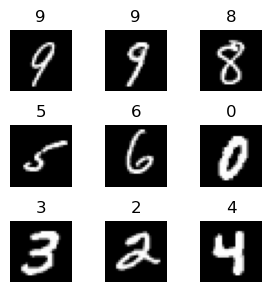

In [20]:
show_batch(3, train)

In [21]:
loss_ls = []
model = Linear(28 * 28, 10)
x, y = get_batch(train)
pred = model(x)
loss = cross_entropy(pred, y)
loss, -e.log(e.Tensor(1/10))

(Tensor(2.3037488, dtype=float32, dtype=float32, grad=True),
 Tensor(2.3025851, dtype=float32, dtype=float32, grad=True))

In [22]:
for epoch in range(10):#41):
    x, y = get_batch(train)
    pred = model(x)
    loss = cross_entropy(pred, y)
    loss_ls.append(loss.data)
    model.weight.grad.data = e.zeros_like(model.weight).data
    model.bias.grad.data = e.zeros_like(model.bias).data
    loss.grad = e.ones_like(loss)
    loss.backward()
    if epoch < 25:
        lr = 0.01
    else:
        lr = 0.01
    model.weight.data = model.weight.data - lr * model.weight.grad.data
    model.bias.data = model.bias.data - lr * model.bias.grad.data
    
loss, #model.weight.grad, model.bias.grad, model.weight[:5, :5]

(Tensor(2.2149334, dtype=float32, dtype=float32, grad=True),)

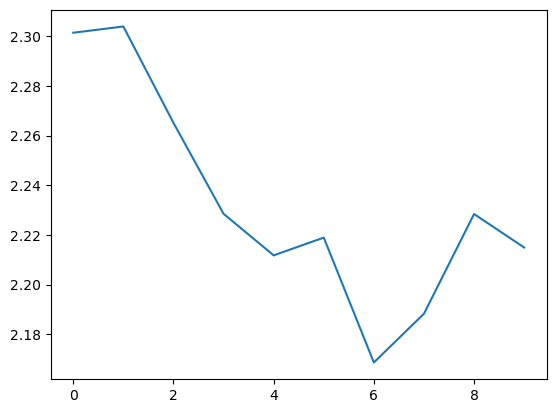

In [23]:
# plot loss
plt.plot(loss_ls)

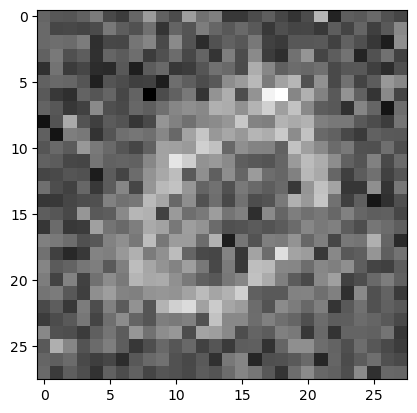

In [24]:
plt.imshow(model.weight.data[0].reshape(28, 28), cmap="gray")

<function matplotlib.pyplot.show(close=None, block=None)>

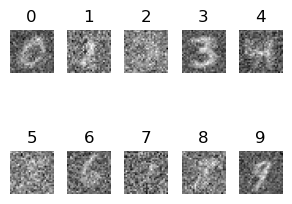

In [25]:
# plot weights as 2x5 grid
fig, axes = plt.subplots(2, 5, figsize=(3, 3))

# Flatten the axes array, as you have a 2D grid
axes = axes.flatten()
i = 0
for ax in axes:
  ax.imshow(model.weight.data[i].reshape(28, 28), cmap="gray")
  ax.axis("off")
  ax.set_title(str(i))
  i += 1
plt.tight_layout(pad=1)
plt.show

SVM Loss

In [34]:
def hinge_loss(pred, y):
    return e.max(1 - pred * y)

In [35]:
loss_ls = []
model = Linear(28 * 28, 10)
x, y = get_batch(train)
pred = model(x)
loss = hinge_loss(pred, y)
loss, -e.log(e.Tensor(1/10))

TypeError: 'Tensor' object cannot be interpreted as an integer

# CIFAR

In [4]:
transforms = tr.Compose([tr.ToTensor(), tr.Normalize((0.5, 0.5, 0.5), (1.0, 1.0, 1.0))])

In [1025]:
train_data = datasets.CIFAR10(root="D:\Github\Dataset", train=True, download=False, transform=transforms)
test_data = datasets.CIFAR10(root="D:\Github\Dataset", train=False, download=False, transform=transforms)

In [1026]:
mu = np.mean(train_data.data, axis=(0, 1, 2)) 
sigma = np.std(train_data.data, axis=(0, 1, 2)) 
def normalize(x):
    return (x - mu) / sigma
def denormalize(x):
    return (x * sigma) + mu 
train_norm = normalize(train_data.data)
test_norm = normalize(test_data.data)
train_norm.shape, test_norm.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [1027]:
np.mean(train_norm, axis=(0, 1, 2)), np.std(train_norm, axis=(0, 1, 2)), mu, sigma

(array([1.90680804e-17, 9.16847154e-17, 1.50768287e-17]),
 array([1., 1., 1.]),
 array([125.30691805, 122.95039414, 113.86538318]),
 array([62.99321928, 62.08870764, 66.70489964]))

In [1028]:
np.mean(test_norm, axis=(0, 1, 2)), np.std(test_norm, axis=(0, 1, 2))

(array([0.01139366, 0.01221011, 0.01482553]),
 array([0.99846288, 0.99756509, 1.00001734]))

In [1029]:
# data to tensor
ztrain = e.zeros((50000, 10))
ztest = e.zeros((10000, 10))
for i, j in enumerate(train_data.targets):
    ztrain[i, j] = 1
for i, j in enumerate(test_data.targets):
    ztest[i, j] = 1
train = (e.Tensor([x.reshape(-1) for x in train_norm]), ztrain)
test = (e.Tensor([x.reshape(-1) for x in test_norm]), ztest)

In [1030]:
train[0].shape, train[1].shape, test[0].shape, test[1].shape

((50000, 3072), (50000, 10), (10000, 3072), (10000, 10))

In [1031]:
e.allclose(train[0][0], e.Tensor((train_data.data[0]/255).reshape(-1))), train[1][0], train_data.targets[0]

(False,
 Tensor([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float64, grad=True),
 6)

In [1032]:
e.allclose(test[0][0], e.Tensor(test_norm[0].reshape(-1))), test[1][0], test_data.targets[0]

(True,
 Tensor([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float64, grad=True),
 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


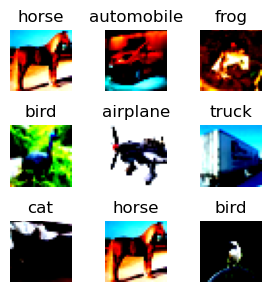

In [1037]:
# show batch of rgb images
show_batch(3, train, shape=(32, 32, 3), cmap=None, cls=train_data.classes, denorm=denormalize)

In [1104]:
train_data.targets[1], train[0][0]

(9,
 Tensor([-1.0526041 , -0.9816663 , -0.76254344, ..., -0.03662169,
        -0.4984867 , -0.6276208 ], dtype=float32, dtype=float32, grad=True))

In [1130]:
loss_ls = []
model = Linear(3072, 10)
x, y = get_batch(train)
pred = model(x)
loss = cross_entropy(pred, y)
loss, -e.log(e.Tensor(1/10))

(Tensor(2.3115106, dtype=float32, dtype=float32, grad=True),
 Tensor(2.3025851, dtype=float32, dtype=float32, grad=True))

In [1172]:
model.weight.data[0] = train[0][49].data
model.weight.data[1] = train[0][4].data
model.weight.data[2] = train[0][6].data
model.weight.data[3] = train[0][9].data
model.weight.data[4] = train[0][3].data
model.weight.data[5] = train[0][27].data
model.weight.data[6] = train[0][0].data
model.weight.data[7] = train[0][7].data
model.weight.data[8] = train[0][8].data
model.weight.data[9] = train[0][1].data
model.weight.data = 0.001 * model.weight.data

In [1202]:
for epoch in range(10):#41):
    x, y = get_batch(train)
    pred = model(x)
    loss = cross_entropy(pred, y)
    loss_ls.append(loss.data)
    model.weight.grad.data = e.zeros_like(model.weight).data
    model.bias.grad.data = e.zeros_like(model.bias).data
    loss.grad = e.ones_like(loss)
    loss.backward()
    if epoch < 25:
        lr = 0.000001
    else:
        lr = 0.01
    model.weight.data = model.weight.data - lr * model.weight.grad.data
    model.bias.data = model.bias.data - lr * model.bias.grad.data
    
loss

Tensor(2.0118093, dtype=float32, dtype=float32, grad=True)

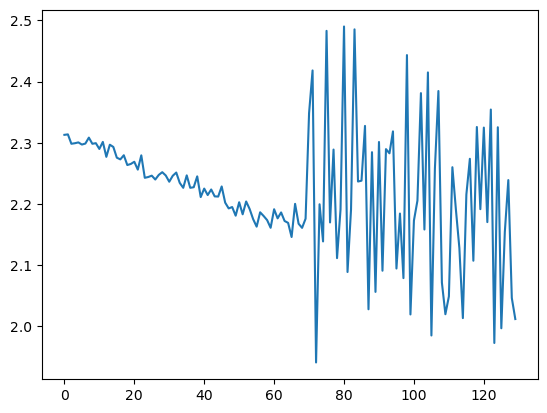

In [1203]:
# plot loss
plt.plot(loss_ls)

In [1204]:
denormalize(model.weight.data[0].reshape(32, 32, 3)).astype(np.uint8)

array([[[125, 123, 114],
        [125, 123, 114],
        [125, 123, 114],
        ...,
        [125, 123, 114],
        [125, 123, 114],
        [125, 123, 114]],

       [[125, 123, 114],
        [125, 123, 114],
        [125, 123, 114],
        ...,
        [125, 123, 114],
        [125, 123, 114],
        [125, 123, 114]],

       [[125, 123, 114],
        [125, 123, 114],
        [125, 123, 114],
        ...,
        [125, 123, 114],
        [125, 123, 114],
        [125, 123, 114]],

       ...,

       [[125, 123, 114],
        [125, 123, 114],
        [125, 123, 114],
        ...,
        [125, 123, 114],
        [125, 123, 114],
        [125, 123, 114]],

       [[125, 123, 114],
        [125, 123, 114],
        [125, 123, 114],
        ...,
        [125, 123, 114],
        [125, 123, 114],
        [125, 123, 114]],

       [[125, 123, 114],
        [125, 123, 114],
        [125, 123, 114],
        ...,
        [125, 123, 114],
        [125, 123, 114],
        [125, 123, 114]]

In [1210]:
m = denormalize(model.weight.data[2].reshape(32, 32, 3)*100).astype(np.uint8)

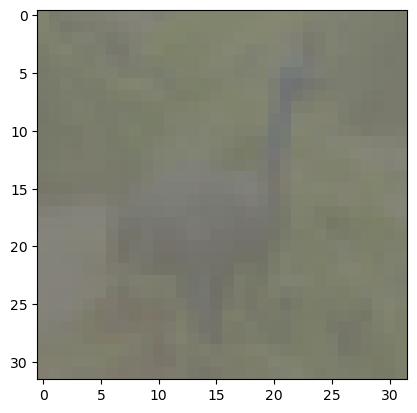

In [1211]:
plt.imshow(m)

<function matplotlib.pyplot.show(close=None, block=None)>

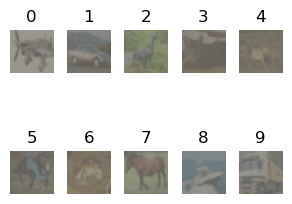

In [1207]:
# plot weights as 2x5 grid
fig, axes = plt.subplots(2, 5, figsize=(3, 3))

# Flatten the axes array, as you have a 2D grid
axes = axes.flatten()
i = 0
for ax in axes:
  ax.imshow(denormalize((model.weight.data[i] * 200).reshape(32, 32, 3)).astype(np.uint8))
  ax.axis("off")
  ax.set_title(str(i))
  i += 1
plt.tight_layout(pad=1)
plt.show